In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_cleaner import read_mta_file

data = read_mta_file("./data/Turnstile_Usage_Data__2018.csv", pickle_ok=True)

In [3]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
data.describe()

,Entries,Exits,entry_delta,exit_delta,time_delta
count,2.307938e+06,2.307938e+06,2.303187e+06,2.303187e+06,2303187
mean,3.943198e+07,3.245869e+07,4.245676e+03,2.639302e+03,0 days 04:00:28.255911
std,2.054488e+08,1.903985e+08,4.386836e+06,2.116909e+06,0 days 01:13:21.832730
min,0.000000e+00,0.000000e+00,-2.113960e+09,-8.241147e+08,0 days 00:00:00
25%,5.111670e+05,2.473715e+05,1.000000e+01,8.000000e+00,0 days 04:00:00
50%,2.569548e+06,1.450620e+06,7.600000e+01,5.200000e+01,0 days 04:00:00
75%,6.894137e+06,4.829568e+06,2.460000e+02,1.680000e+02,0 days 04:00:00
max,2.130007e+09,2.062656e+09,2.105700e+09,1.835852e+09,53 days 08:00:00


In [5]:
data.head(3)

,C/A,Unit,SCP,Station,Description,Entries,Exits,ts_id,date_time,b_weekday,Weekday,entry_delta,exit_delta,time_delta
0,H007,R248,00-00-00,1 AV,REGULAR,13374456,14948386,R248_00-00-00,2018-04-01 00:00:00,False,Sunday,NaN,NaN,NaT
1,H007,R248,00-00-00,1 AV,REGULAR,13374533,14948676,R248_00-00-00,2018-04-01 04:00:00,False,Sunday,77.0,290.0,04:00:00
2,H007,R248,00-00-00,1 AV,REGULAR,13374584,14948858,R248_00-00-00,2018-04-01 08:00:00,False,Sunday,51.0,182.0,04:00:00


/Users/jlc/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


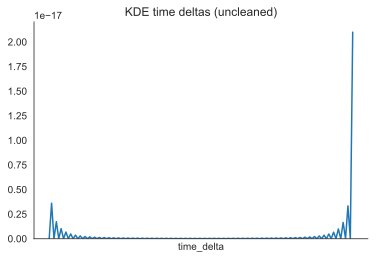

In [34]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sns.set_style("white")
sns.distplot(data['time_delta'],  hist=False)
plt.title("KDE time deltas (uncleaned)")
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_ticks([])

filename = "./plots/unclean_kde.svg"
plt.savefig(filename)
plt.show()

In [30]:
too_small = pd.Timedelta(minutes=3)
too_small_data = data[data.time_delta < too_small]

(4416, 14)

/Users/jlc/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


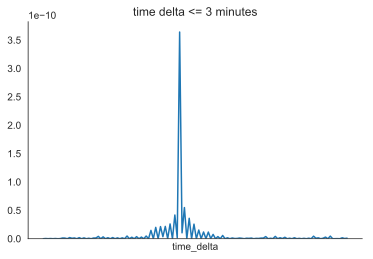

In [35]:

sns.set_style("white")
sns.distplot(too_small_data['time_delta'],  hist=False)
plt.title("time delta <= 3 minutes")
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_ticks([])

filename = "./plots/too_small_kde.svg"
plt.savefig(filename)
plt.show()

In [11]:
too_small_data.index

Int64Index([  11075,   11076,   11077,   11078,   11079,   11080,   11081,
              11082,   11083,   11084,
            ...
            2298811, 2299306, 2299801, 2300296, 2300791, 2301285, 2301780,
            2302275, 2302770, 2303265],
           dtype='int64', length=4416)

In [17]:
too_small_data.entry_delta.describe()

count    4.416000e+03
mean    -2.806342e+03
std      1.865555e+05
min     -1.239717e+07
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.100000e+01
Name: entry_delta, dtype: float64

In [18]:
# poked around nothing worth keeping here!

In [19]:
data = data.drop(axis='index', labels=too_small_data.index)

In [23]:
too_long = pd.Timedelta(hours=5, minutes=30)
too_long_data = data[data.time_delta > too_long]

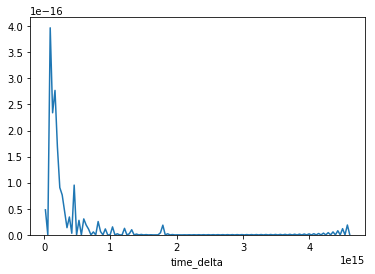

In [25]:
sns.distplot(too_long_data['time_delta'], hist=False)

In [28]:
# In order to standardize the graphs, we really only want to plot the four hour chunks

data.loc[too_long_data.index, ['entry_delta', 'exit_delta']] = np.nan

In [30]:
data.loc[2580]

C/A                           H008
Unit                          R248
SCP                       01-00-00
Station                       1 AV
Description                REGULAR
Entries                     191286
Exits                      2841693
ts_id                R248_01-00-00
date_time      2018-04-19 12:00:00
b_weekday                     True
Weekday                   Thursday
entry_delta                    NaN
exit_delta                     NaN
time_delta         0 days 08:00:00
Name: 2580, dtype: object

/Users/jlc/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/jlc/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


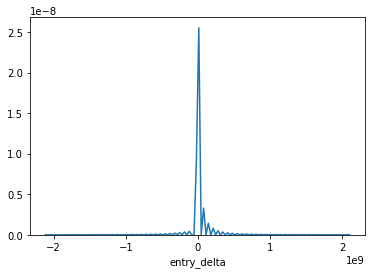

In [31]:
sns.distplot(data['entry_delta'], hist=False)

In [32]:
data['entry_delta'].describe()

count    2.295960e+06
mean     4.065615e+03
std      3.127513e+06
min     -2.113960e+09
25%      1.000000e+01
50%      7.600000e+01
75%      2.460000e+02
max      2.105700e+09
Name: entry_delta, dtype: float64

In [45]:
data.entry_delta.quantile(q=.99995)

2924.212299999781

In [48]:
data.entry_delta.quantile(q=.00009)

-1965.1827299999998

In [51]:
# As an initial guess that won't toss much data, let's say that
# 5000 is a reasonable guess at the max a turnstile would ever really 
# handle in a four hour period

In [52]:
bogus_entry = data.query('(entry_delta < -5000) or (entry_delta > 5000)')
bogus_exit = data.query('(exit_delta < -5000) or (exit_delta > 5000)')



In [57]:
data.loc[bogus_entry.index, 'entry_delta'] = np.nan
data.loc[bogus_exit.index, 'exit_delta'] = np.nan

In [59]:
data.loc[18789]

C/A                           N137
Unit                          R354
SCP                       00-00-00
Station                     104 ST
Description                REGULAR
Entries                        116
Exits                           19
ts_id                R354_00-00-00
date_time      2018-04-03 12:00:00
b_weekday                     True
Weekday                    Tuesday
entry_delta                    NaN
exit_delta                     NaN
time_delta         0 days 04:00:00
Name: 18789, dtype: object

In [66]:
neg_entry = data.query('entry_delta < 0')
neg_exit = data.query('exit_delta < 0')

In [67]:
neg_entry.describe()

,Entries,Exits,entry_delta,exit_delta,time_delta
count,1.925300e+04,1.925300e+04,19253.000000,19247.000000,19253
mean,1.212942e+09,1.108316e+09,-342.172545,-0.161272,0 days 03:58:49.723575
std,6.364691e+08,6.070346e+08,391.613995,353.922138,0 days 00:15:08.289038
min,0.000000e+00,0.000000e+00,-4867.000000,-3839.000000,0 days 00:03:48
25%,6.907958e+08,7.030586e+08,-503.000000,-76.000000,0 days 04:00:00
50%,1.256733e+09,1.094902e+09,-204.000000,7.000000,0 days 04:00:00
75%,1.759126e+09,1.595304e+09,-54.000000,118.000000,0 days 04:00:00
max,2.130007e+09,2.062656e+09,-1.000000,1659.000000,0 days 04:14:17


In [68]:
neg_exit.describe()

,Entries,Exits,entry_delta,exit_delta,time_delta
count,1.502700e+04,1.502700e+04,15008.000000,15027.000000,15027
mean,1.072568e+09,1.176861e+09,-67.533382,-254.931856,0 days 03:59:06.171491
std,6.401298e+08,5.764560e+08,387.636021,364.702921,0 days 00:13:09.821883
min,0.000000e+00,0.000000e+00,-4569.000000,-4882.000000,0 days 00:03:53
25%,5.276675e+08,7.362113e+08,-206.000000,-339.000000,0 days 04:00:00
50%,1.040667e+09,1.200676e+09,-18.000000,-114.000000,0 days 04:00:00
75%,1.568163e+09,1.691013e+09,65.000000,-34.000000,0 days 04:00:00
max,2.130007e+09,2.062656e+09,2083.000000,-1.000000,0 days 04:14:17


In [64]:
fixed = data.loc[neg_entry.index, 'entry_delta'].apply(np.abs)

In [65]:
fixed.describe()

count    19253.000000
mean       342.172545
std        391.613995
min          1.000000
25%         54.000000
50%        204.000000
75%        503.000000
max       4867.000000
Name: entry_delta, dtype: float64

In [69]:
data.loc[neg_entry.index, 'entry_delta'] = data.loc[neg_entry.index, 'entry_delta'].apply(np.abs)
data.loc[neg_exit.index, 'exit_delta'] = data.loc[neg_exit.index, 'exit_delta'].apply(np.abs)

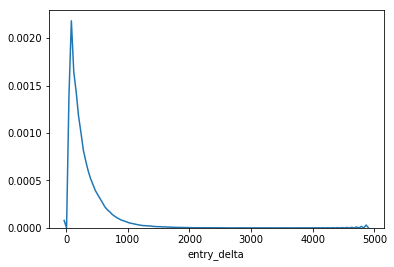

In [71]:
sns.distplot(data.entry_delta, hist=False)

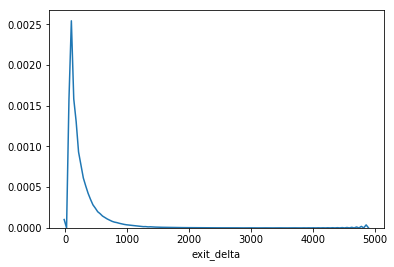

In [73]:

sns.distplot(data.exit_delta, hist=False)